<a href="https://colab.research.google.com/github/shabbar88/MY_MACHINE_LEARNING/blob/main/Multiple_Linear_Regression_Using_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [52]:

import numpy as  np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [53]:

data=pd.read_csv("https://github.com/shabbar88/LATEST-DATA--SCIENCE/raw/main/Advertising.csv")

In [54]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [55]:
data.shape

(200, 4)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [57]:
data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [58]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

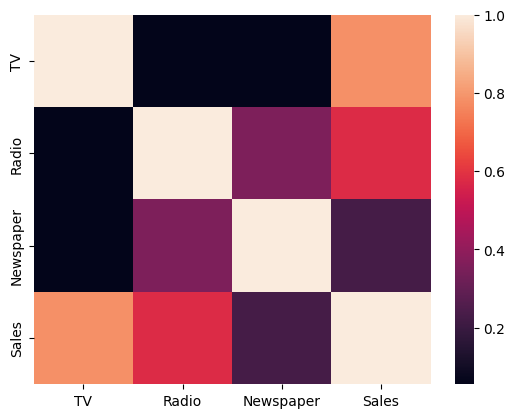

In [59]:
sns.heatmap(data.corr())

In [60]:
# X -- dimensions/features
X=data.iloc[:,0:-1]

In [61]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [62]:
# y -- target variable
y=data.iloc[:,-1]
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [63]:
X.drop(columns=['Newspaper'],axis=1,inplace=True)
# drop Newspaper column because it is weakly correlated

In [64]:
X.head()

,TV,Radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8


In [65]:
# splitting the data into 2 parts that is train n test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2,random_state=110)

In [66]:
X_train.head()

,TV,Radio
165,234.5,3.4
25,262.9,3.5
43,206.9,8.4
63,102.7,29.6
181,218.5,5.4


In [67]:
X_train.shape

(160, 2)

In [68]:
y_train.head()

165    11.9
25     12.0
43     12.9
63     14.0
181    12.2
Name: Sales, dtype: float64

In [69]:
X_test.shape

(40, 2)

In [70]:
y_train.shape

(160,)

In [71]:
y_test.shape

(40,)

In [72]:
X_train.describe()

,TV,Radio
count,160.000000,160.000000
mean,145.585000,22.281875
std,86.935101,15.097481
min,0.700000,0.000000
25%,69.000000,8.350000
50%,150.650000,20.950000
75%,218.825000,36.525000
max,296.400000,49.600000


In [73]:
X_train.columns

Index(['TV', 'Radio'], dtype='object')

In [74]:
# applying standard scalar to bring data to the standard form
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['TV', 'Radio']] = scaler.fit_transform(X_train[['TV', 'Radio']])
X_train.head()

,TV,Radio
165,1.025986,-1.254591
25,1.353692,-1.247946
43,0.707511,-0.922370
63,-0.494848,0.486247
181,0.841362,-1.121702


In [75]:
X_train.describe()

,TV,Radio
count,1.600000e+02,1.600000e+02
mean,-1.110223e-16,2.747802e-16
std,1.003140e+00,1.003140e+00
min,-1.671821e+00,-1.480501e+00
25%,-8.837104e-01,-9.256920e-01
50%,5.844478e-02,-8.849534e-02
75%,8.451127e-01,9.463727e-01
max,1.740247e+00,1.815130e+00


In [76]:
X_test.columns

Index(['TV', 'Radio'], dtype='object')

In [77]:
# APPLYING STANDARD SCALER ON TEST DATA AS WELL
X_test[['TV', 'Radio']] = scaler.fit_transform(X_test[['TV', 'Radio']])
X_test.head()

,TV,Radio
168,0.770473,-0.274485
197,0.297303,-1.367078
147,1.113029,1.666204
124,0.944215,0.390239
140,-0.979272,-0.778759


In [78]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [79]:
model.intercept_

13.646875

In [80]:
model.coef_

array([3.95940425, 2.76381841])

In [81]:
X_train.columns

Index(['TV', 'Radio'], dtype='object')

In [82]:
y_pred_test = model.predict(X_test)
y_pred_test

array([15.93886121, 11.04566003, 22.65889082, 18.46395442,  7.61719419,
        5.77651784,  8.12345939, 16.95102253,  8.82293176,  9.97596351,
       16.13485265, 12.2048022 , 18.30748659, 15.6868618 ,  4.77145328,
       20.61990672, 19.97161342, 20.58203468, 23.15175158,  7.73169875,
       14.37110447,  8.01343962, 20.71245677, 15.83027029,  8.40675246,
       12.34357856, 19.1110411 ,  6.41039686, 12.72770106,  4.89593725,
       18.14165562,  8.18725431, 10.25730935, 23.55807482, 11.50119112,
        7.26941698, 12.18728352, 16.97243566, 10.1779425 , 20.26284029])

In [83]:
y_test.tail()

29     10.5
161    13.3
105    19.2
6      11.8
111    21.8
Name: Sales, dtype: float64

In [84]:
print(y_test)

168    17.1
197    12.8
147    25.4
124    19.7
140    10.9
65      9.3
151    11.6
20     18.0
71     12.4
86     12.0
41     17.1
100    11.7
28     18.9
27     15.9
119     6.6
42     20.7
185    22.6
55     23.7
198    25.5
79     11.0
118    15.9
138     9.6
30     21.4
187    17.3
82     11.3
77     14.2
53     21.2
191     9.9
135    11.6
10      8.6
92     19.4
38     10.1
116    12.2
183    26.2
115    12.6
29     10.5
161    13.3
105    19.2
6      11.8
111    21.8
Name: Sales, dtype: float64


In [85]:
y_pred_train = model.predict(X_train)
y_pred_train

array([14.24170638, 15.55759151, 13.89893329, 13.03147017, 13.87798781,
       14.64690217, 17.1200731 ,  3.5756048 ,  7.61991582, 14.68638712,
        6.42658793, 21.06945121,  5.71519777,  7.08887417, 18.25413031,
       14.81301036, 17.94734165, 12.7224586 ,  8.10871296, 11.99460268,
       15.2076707 , 15.96770959, 12.57420656, 17.56000455, 15.18201234,
        8.39743607, 14.25728449, 13.30671771, 14.02238072, 18.27017982,
       15.07073151, 16.28061417, 13.5783494 , 10.62629871,  7.49027355,
       20.1945369 , 16.68304536, 18.02038378, 23.03219873, 23.14101841,
       15.03539398, 10.01663565, 14.20062416, 11.9306692 , 12.65214467,
        8.06382676, 16.75303458, 13.14722819, 12.15377001,  9.86233546,
       11.67799829, 16.16740378, 18.79991503, 15.55248867, 11.70081314,
        8.76993604, 10.38142243, 11.6206496 , 12.11852656,  7.5330208 ,
       18.23716181, 12.28110287, 18.28067886, 20.5544014 , 16.26269277,
       21.64306713, 14.61239716, 12.30586853, 11.9012382 ,  8.81

In [86]:
y_train

165    11.9
25     12.0
43     12.9
63     14.0
181    12.2
       ... 
89     16.7
125    10.6
15     22.4
61     24.2
128    24.7
Name: Sales, Length: 160, dtype: float64

In [87]:
from sklearn.metrics import r2_score

In [88]:
R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred_test)
print(R2_train," ",R2_test)

0.8820440065485304   0.8227345476241517


In [89]:
# vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [90]:
# the independent variables set
X = data[['TV', 'Radio', 'Newspaper']]

In [91]:
X.columns

Index(['TV', 'Radio', 'Newspaper'], dtype='object')

In [92]:
X.values

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

In [93]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [94]:
vif_data

,feature
0,TV
1,Radio
2,Newspaper


In [95]:
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

     feature       VIF
0         TV  2.486772
1      Radio  3.285462
2  Newspaper  3.055245


In [96]:
"""
               VIF = 1 / (1 - R-squared)
               Tolerance = 1 - R-squared
"""

'\n               VIF = 1 / (1 - R-squared)\n               Tolerance = 1 - R-squared\n'